In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# read the data
marun = pd.read_csv("/Users/jiananwang/ob_library/StoriesofYourLifeandOthers/Others/MediaNote/DocumentNote/AC6006 Course Materials/AY23 CBA/marun_sample2.csv")
marun.head()

,Northing,Easting,Depth (ft),Formation,Pore pressure,Fracture pressure,Mud pressure (psi),Hole size (in),METERAGE,DRLTIME,WOB,Pump flow rate,Pump pressure,MFVIS,RETSOLID,FAN600,FAN300,MIN10GEL,RPM,MUDLOSSU
0,1910415,1017902,17.0,1,7.361,11.56,7.7418,26.0,17.0,10.0,4.0,300,200,70,4.0,48.0,42.0,18.0,70.0,0.0
1,1933305,1007091,21.0,1,9.093,14.28,9.5634,26.0,21.0,20.0,2.5,400,155,70,6.0,56.0,47.0,26.0,65.0,0.0
2,1898014,1035395,23.0,1,9.959,15.64,10.3155,26.0,23.0,9.0,5.0,700,750,100,0.0,NaN,NaN,NaN,85.0,0.0
3,1927084,1012494,28.0,1,12.124,19.04,12.7512,26.0,28.0,5.0,6.0,450,525,56,0.3,56.0,50.0,22.0,75.0,0.0
4,1899352,1035235,40.0,1,17.320,27.20,18.2160,26.0,40.0,7.0,7.5,450,800,77,3.0,52.0,45.0,20.0,120.0,0.0


In [22]:
# check NAs
marun[marun.isna().sum(axis=1) >= 1]

,Northing,Easting,Depth (ft),Formation,Pore pressure,Fracture pressure,Mud pressure (psi),Hole size (in),METERAGE,DRLTIME,WOB,Pump flow rate,Pump pressure,MFVIS,RETSOLID,FAN600,FAN300,MIN10GEL,RPM,MUDLOSSU
2,1898014,1035395,23.0,1,9.959,15.64,10.3155,26.0,23.0,9.0,5.0,700,750,100,0.0,NaN,NaN,NaN,85.0,0.0
5,1908883,1022901,46.0,1,19.918,31.28,21.1071,26.0,46.0,12.0,10.0,850,1500,75,3.0,52.0,45.0,20.0,110.0,NaN


In [23]:
# remove NAs
marun.dropna(axis=0, inplace=True)
marun.shape

(2666, 20)

In [24]:
# high level summary of the data
round(marun.describe(),3)

,Northing,Easting,Depth (ft),Formation,Pore pressure,Fracture pressure,Mud pressure (psi),Hole size (in),METERAGE,DRLTIME,WOB,Pump flow rate,Pump pressure,MFVIS,RETSOLID,FAN600,FAN300,MIN10GEL,RPM,MUDLOSSU
count,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000,2666.000
mean,1907506.359,1026741.829,2820.896,5.876,1644.795,2408.371,1856.067,12.287,48.686,16.479,20.884,548.237,1970.281,46.965,22.866,78.469,46.174,5.604,138.076,97.777
std,14500.886,12443.238,924.627,4.638,813.182,918.451,891.246,4.922,40.963,7.294,9.415,277.471,838.566,12.069,16.817,62.436,33.695,3.579,46.668,161.014
min,1887146.000,1005840.000,17.000,1.000,7.361,11.560,7.742,4.125,0.320,0.100,1.000,80.000,50.000,27.000,0.000,3.000,2.000,1.000,20.000,0.000
25%,1894026.250,1015021.000,2265.250,2.000,1082.946,1705.730,1305.786,8.375,18.000,10.000,15.000,280.000,1300.000,38.000,8.000,30.000,20.000,3.000,95.000,0.000
50%,1904100.000,1028644.000,2927.500,4.000,1356.340,2608.722,1589.104,12.250,40.000,19.000,20.000,525.000,2225.000,44.000,18.000,49.000,30.000,5.000,155.000,25.000
75%,1915773.000,1038001.000,3514.250,9.000,2362.275,3075.592,2580.659,17.500,68.000,23.000,25.000,850.000,2735.000,56.000,42.000,128.000,73.000,7.000,180.000,126.000
max,1936056.000,1049982.000,5662.000,15.000,3398.400,4472.980,4922.543,26.000,650.000,24.000,70.000,1000.000,2950.000,100.000,61.000,293.000,163.000,49.000,394.000,999.000


In [25]:
# distribution of target variable
round((sum(marun['MUDLOSSU'] <= 20) / marun.shape[0]) * 100, 2)
# 47.26% percentage of our target variable is smaller than 20
# very imbalanced distribution

47.26

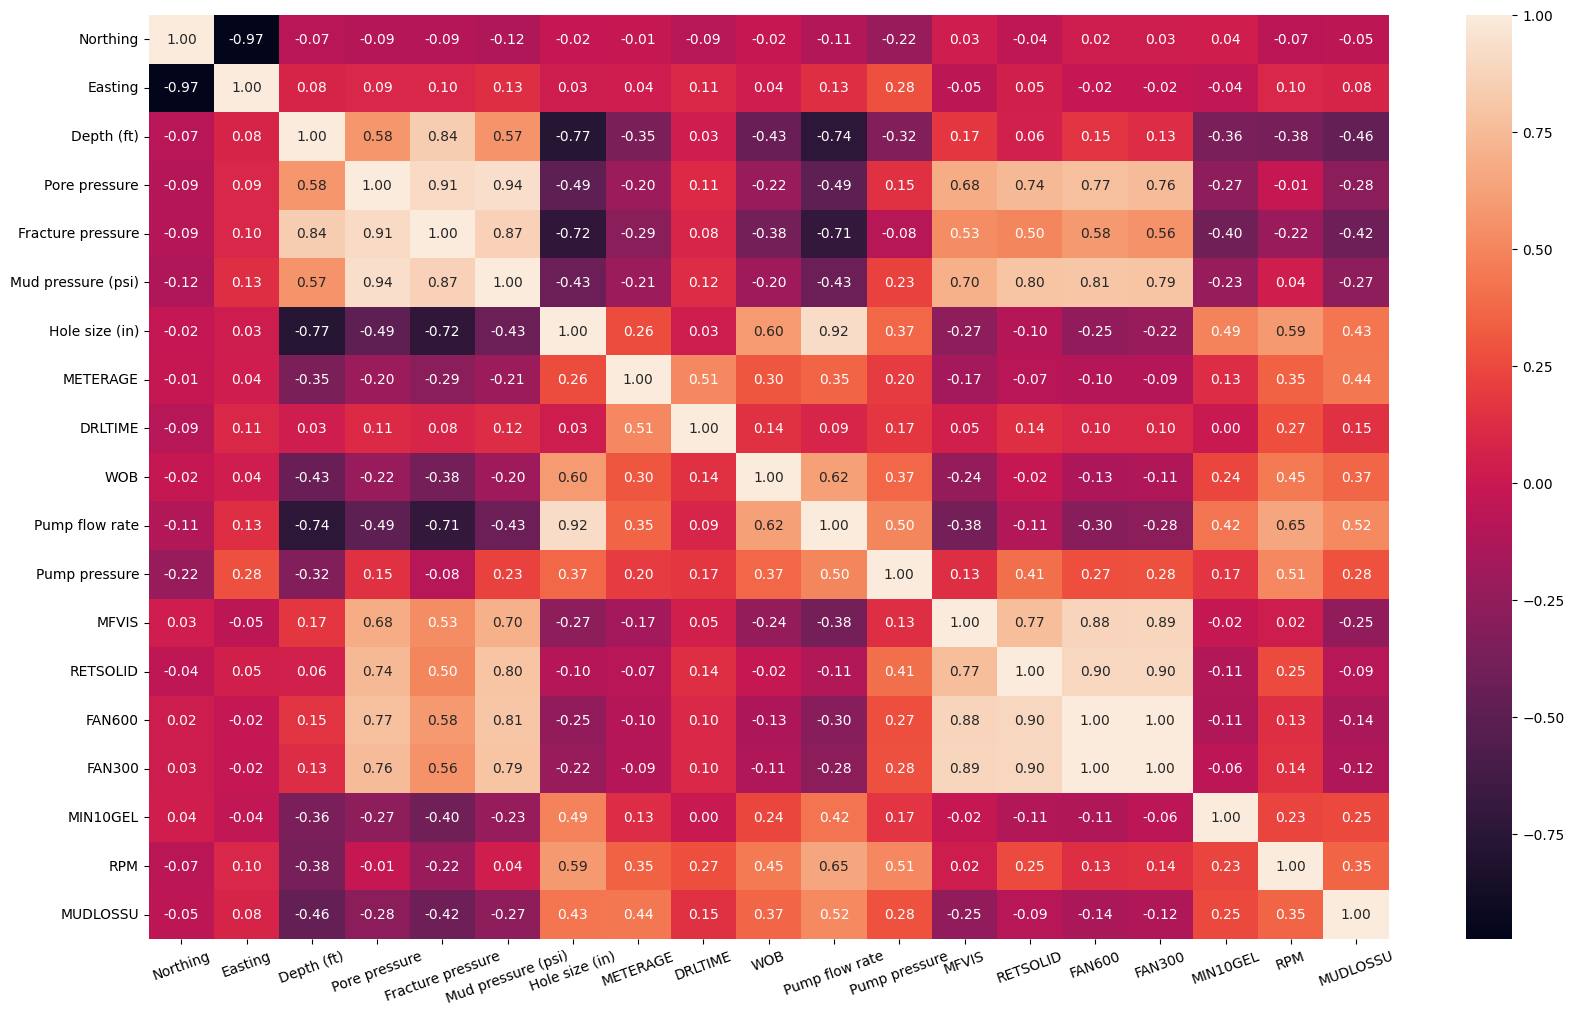

In [26]:
# plot the corr heatmap
marun_for_corr = marun.drop(["Formation"], axis=1, inplace=False)
plt.figure(figsize=(20,12))
sns.heatmap(marun_for_corr.corr(), annot=True, fmt = ".2f")
plt.xticks(rotation=20)
plt.show()

In [27]:
# pairs of variables with more than 0.7 correlation
marun.corr()[abs(marun.corr()) > 0.7]
my_set = set()
for i in marun.columns:
    for j in marun.columns:
        if (abs(marun.corr()).loc[i, j] > 0.7) and ((j, i) not in my_set) and (j != i):
            my_set.add((i, j))
my_set

{('Depth (ft)', 'Fracture pressure'),
 ('Depth (ft)', 'Hole size (in)'),
 ('Depth (ft)', 'Pump flow rate'),
 ('FAN600', 'FAN300'),
 ('Fracture pressure', 'Hole size (in)'),
 ('Fracture pressure', 'Mud pressure (psi)'),
 ('Fracture pressure', 'Pump flow rate'),
 ('Hole size (in)', 'Pump flow rate'),
 ('MFVIS', 'FAN300'),
 ('MFVIS', 'FAN600'),
 ('MFVIS', 'RETSOLID'),
 ('Mud pressure (psi)', 'FAN300'),
 ('Mud pressure (psi)', 'FAN600'),
 ('Mud pressure (psi)', 'MFVIS'),
 ('Mud pressure (psi)', 'RETSOLID'),
 ('Northing', 'Easting'),
 ('Pore pressure', 'FAN300'),
 ('Pore pressure', 'FAN600'),
 ('Pore pressure', 'Fracture pressure'),
 ('Pore pressure', 'Mud pressure (psi)'),
 ('Pore pressure', 'RETSOLID'),
 ('RETSOLID', 'FAN300'),
 ('RETSOLID', 'FAN600')}

In [28]:
# distribution of Formation
marun['Formation'].value_counts()

2     627
1     514
7     240
13    231
9     187
8     183
3     177
10    169
15    145
14     52
6      52
4      34
11     24
5      20
12     11
Name: Formation, dtype: int64

In [29]:
# ten different hole sizes are identified, interpreted as categorical, level one = 4.125
marun['Hole size (in)'].astype(str).value_counts()

17.5     840
12.25    766
8.375    477
5.625    278
4.125     94
6.125     77
8.5       67
26.0      63
16.75      2
7.0        2
Name: Hole size (in), dtype: int64

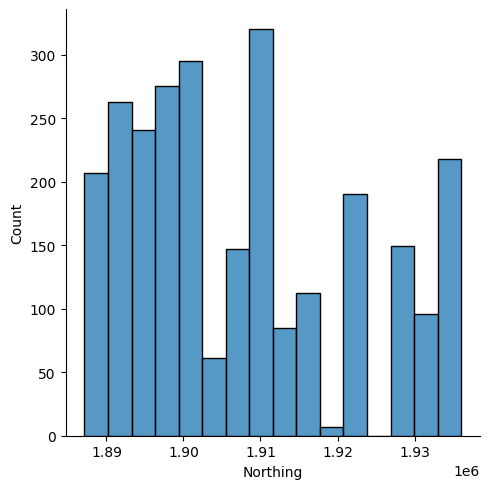

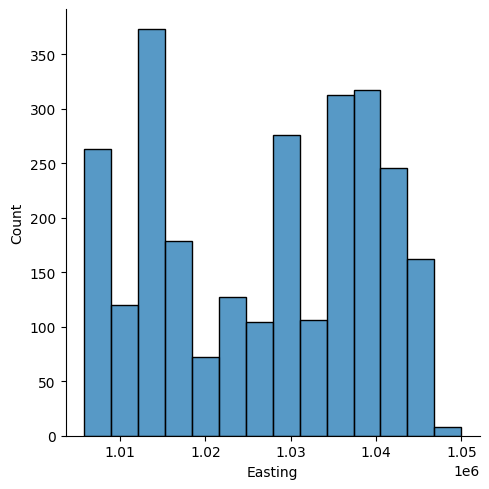

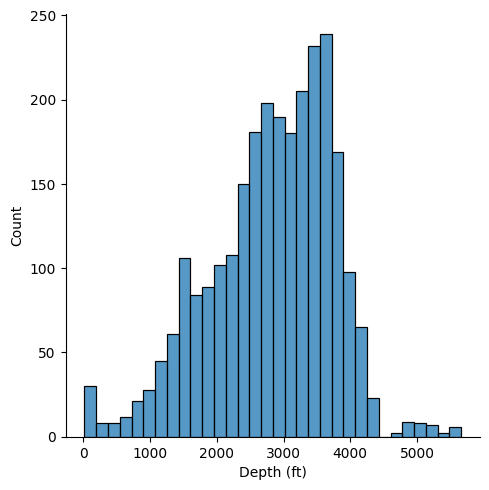

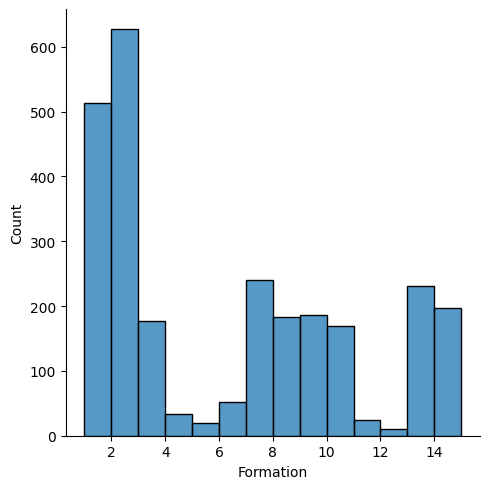

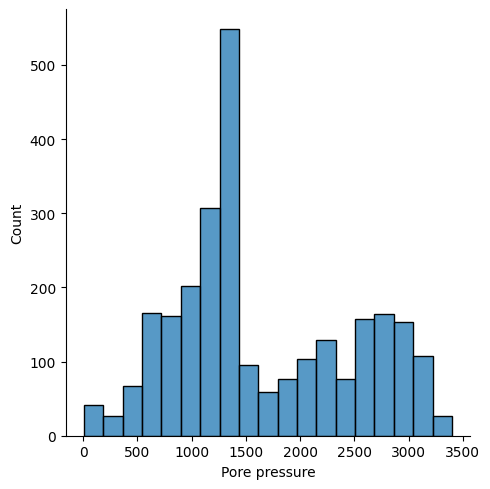

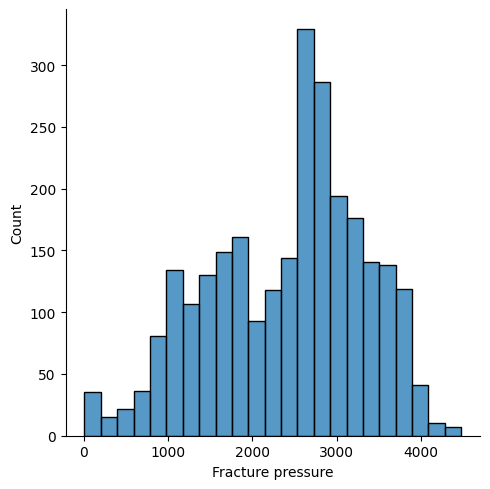

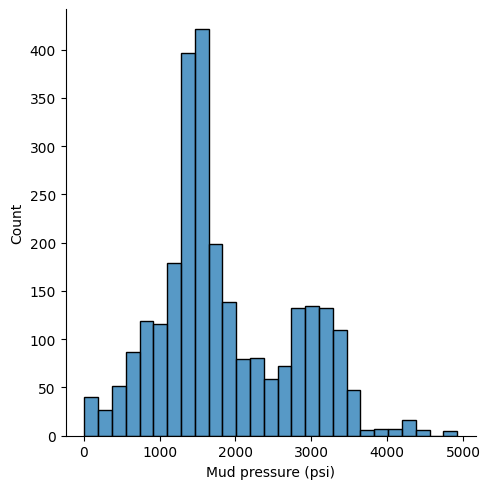

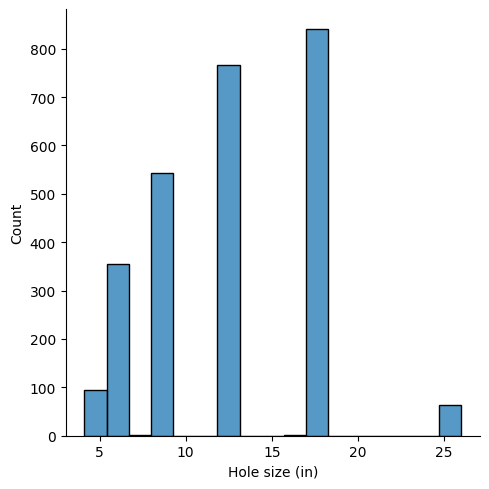

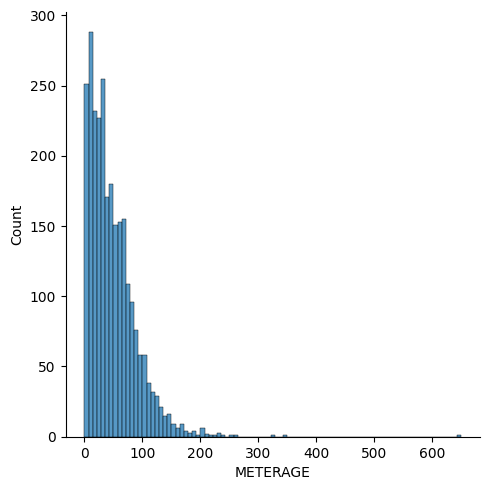

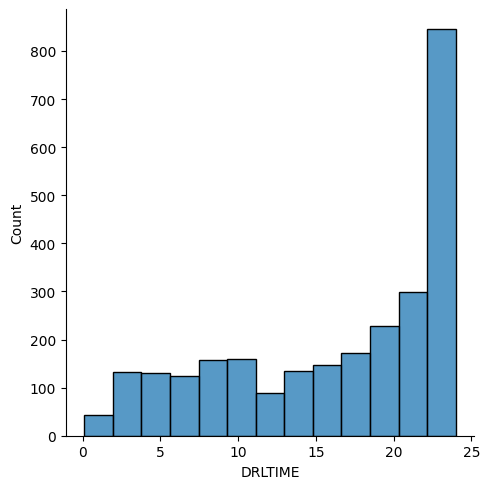

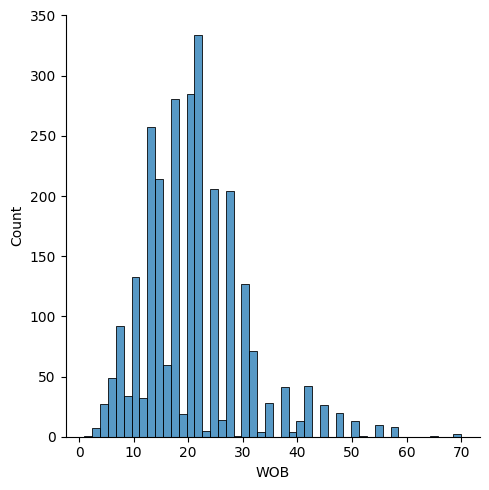

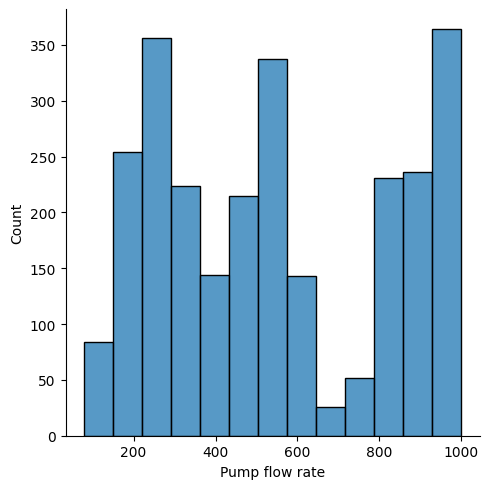

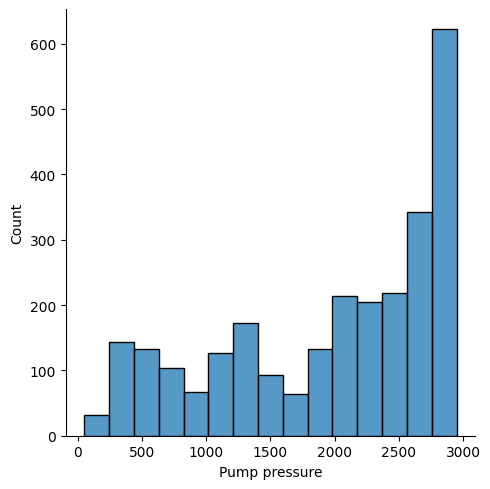

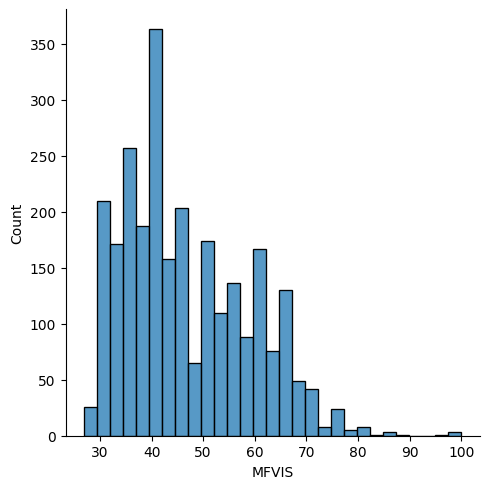

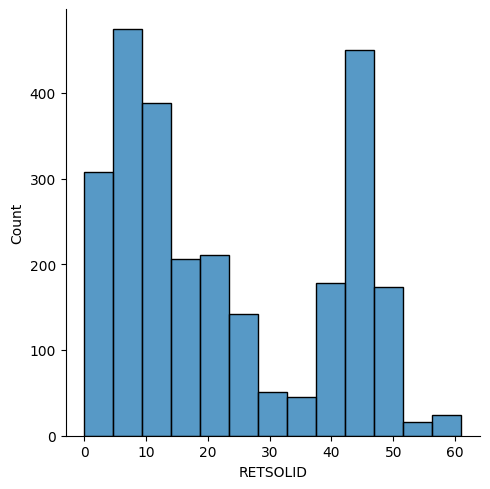

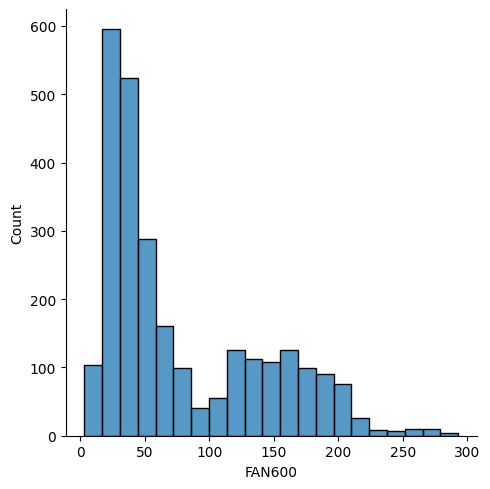

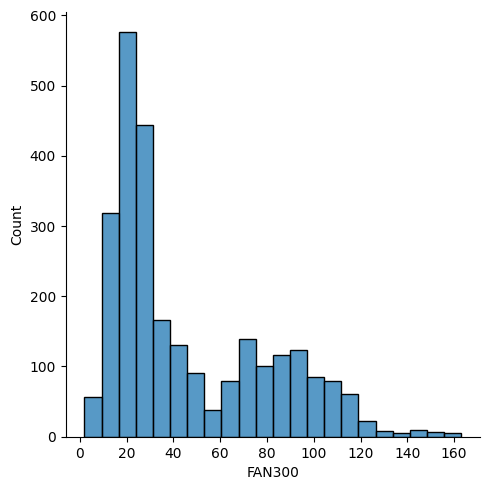

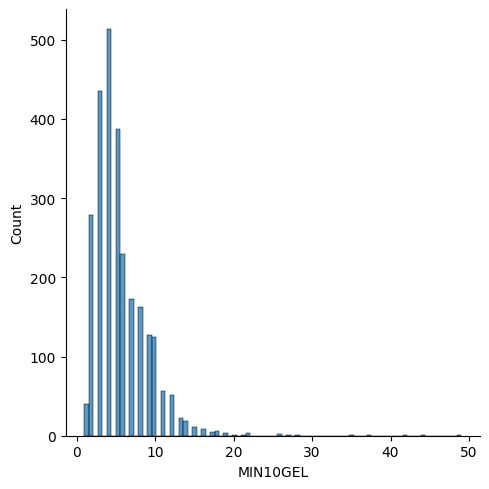

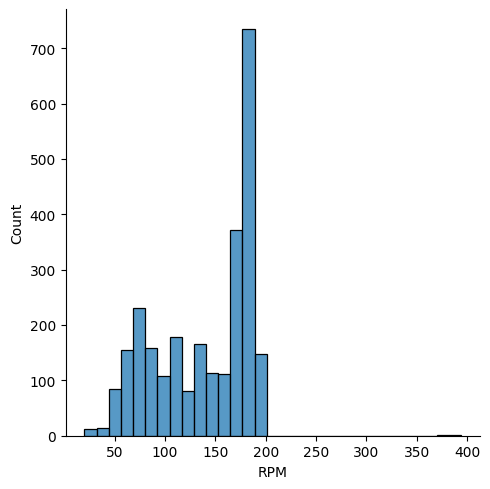

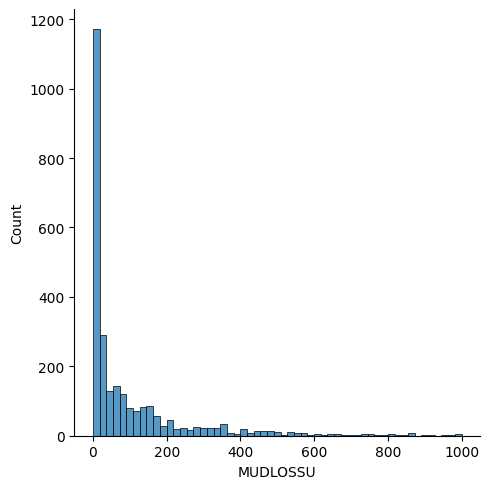

In [ ]:
# check the distribution of all variables
for column in marun.columns:
    sns.displot(marun[column])

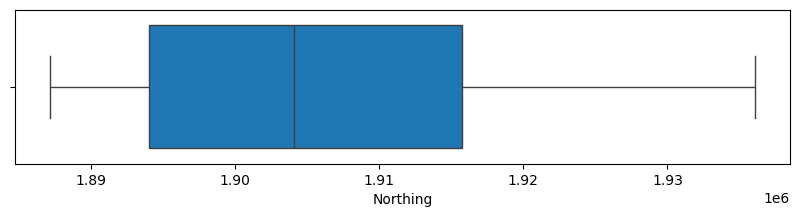

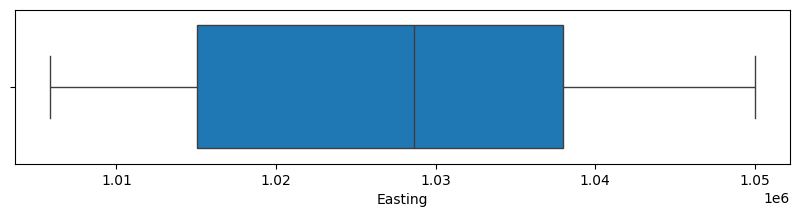

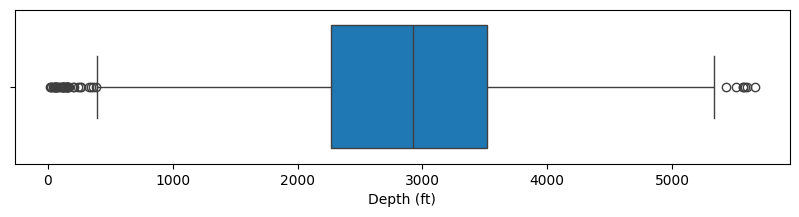

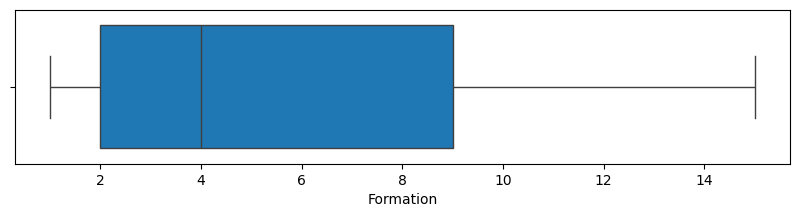

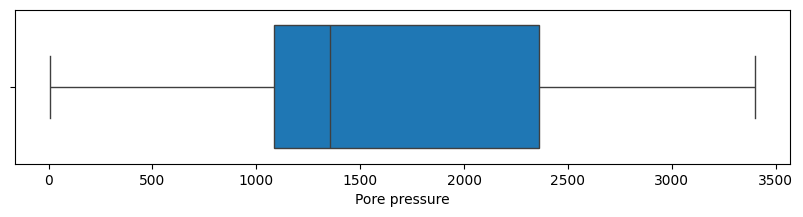

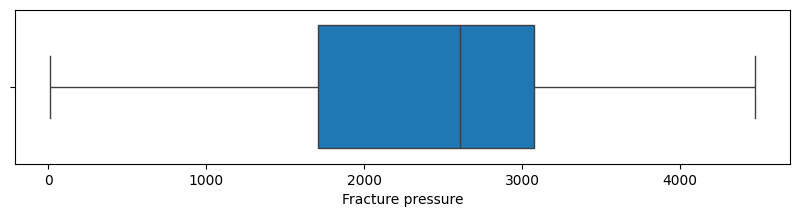

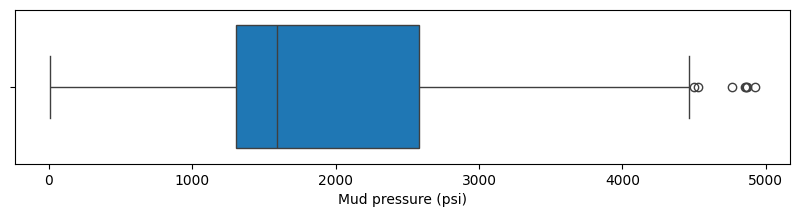

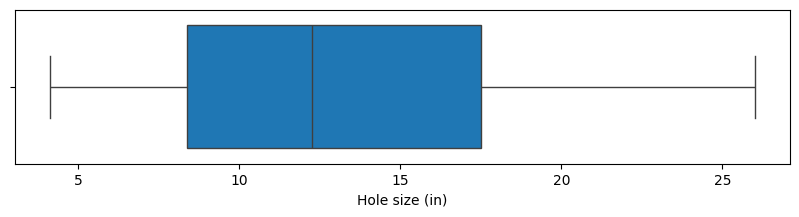

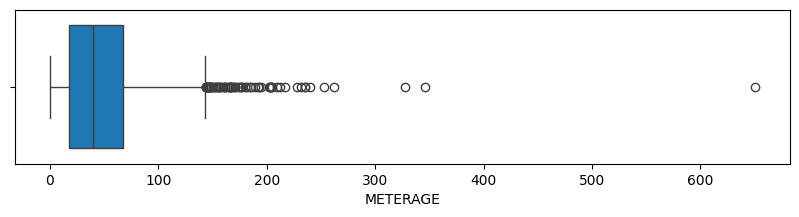

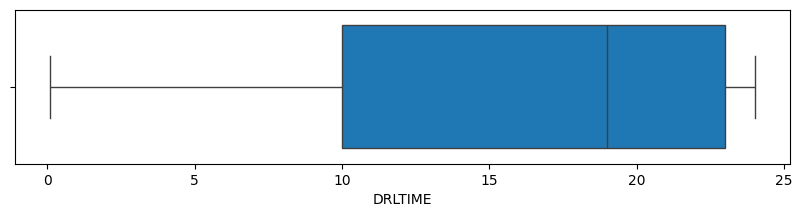

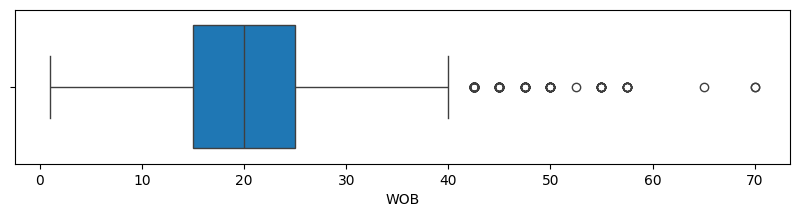

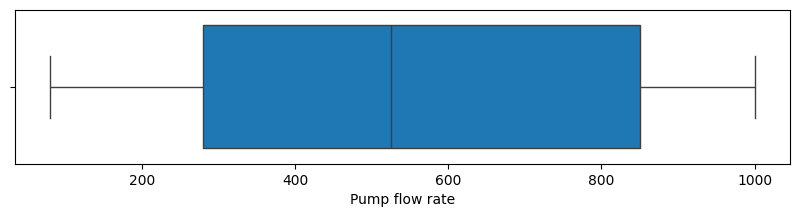

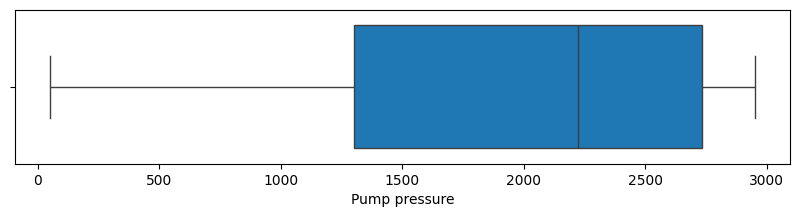

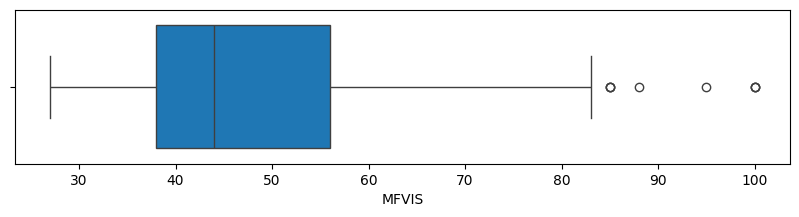

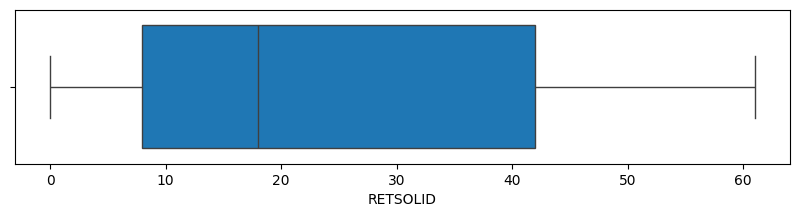

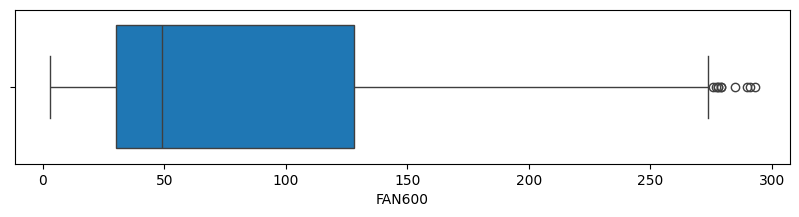

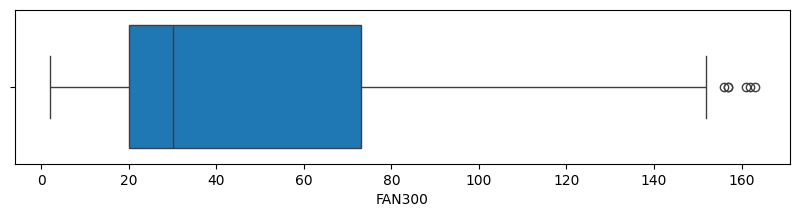

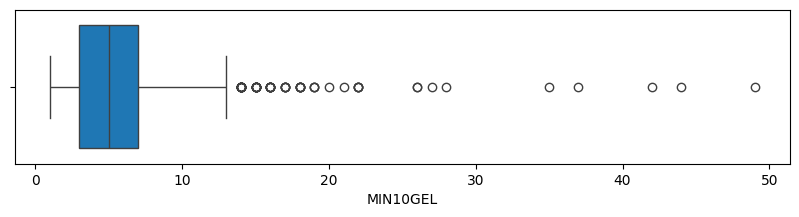

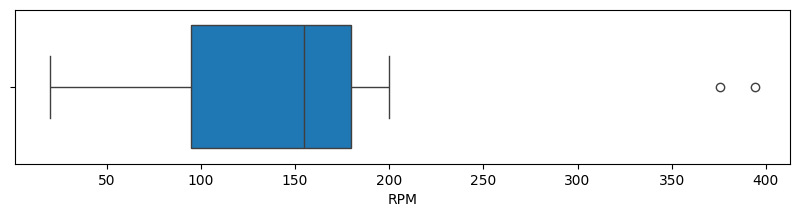

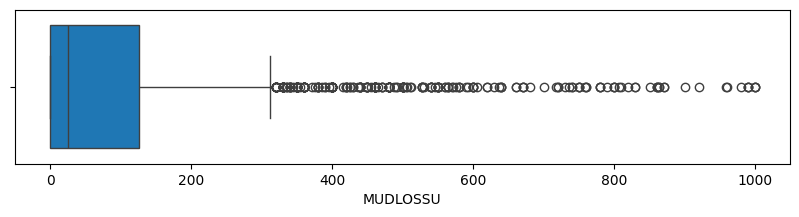

In [30]:
# identify any outliers 
for column in marun.columns:
    plt.figure(figsize=(10,2))
    sns.boxplot(x=marun[column], saturation=1)
    plt.show()

In [31]:
# check any similar variables may be interpreted as categorical for reason like in Hole size (in)
marun_str = pd.DataFrame()
for column in marun.columns:
    marun_str[column] = marun[column].astype(str)

for column in marun_str:
    print(column, len(marun_str[column].value_counts()), marun_str[column].value_counts().index.unique())

Northing 62 Index(['1915773', '1936056', '1908883', '1920957', '1927084', '1887965',
       '1921175', '1911340', '1933305', '1928249', '1901163', '1901861',
       '1904100', '1934676', '1906000', '1901265', '1907900', '1900266',
       '1932633', '1893525', '1890803', '1910415', '1899352', '1891966',
       '1890141', '1931442', '1894441', '1891823', '1887146', '1891596',
       '1893888', '1913770', '1914180', '1887285', '1897071', '1892983',
       '1893815', '1898058', '1900008', '1897145', '1893400', '1897139',
       '1893595', '1898014', '1910015', '1906792', '1910007', '1922969',
       '1899156', '1911541', '1896320', '1890933', '1911157', '1908922',
       '1902020', '1891035', '1922090', '1900674', '1890349', '1918000',
       '1933800', '1907564'],
      dtype='object')
Easting 62 Index(['1015021', '1006641', '1022901', '1012336', '1012494', '1044892',
       '1013094', '1016947', '1007091', '1011699', '1028822', '1028091',
       '1025650', '1008730', '1029100', '1032792'

In [ ]:
# end of data exploration